In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from lightgbm import LGBMClassifier, plot_importance


# 맑은 고딕 적용
# font_path = 'C:/Users/Beomsu/AppData/Local/Microsoft/Windows/Fonts/NanumSquareR.ttf'
# font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
# matplotlib.rc('font', family = font_name)
# from matplotlib import font_manager,rc

%matplotlib inline

from tqdm.notebook import tqdm

## Raw Data (초도모델용) -> String Data 다 빠져있음!

초도모델 데이터에 변수를 하나씩 추가하는 방향으로 진행

In [2]:
df_raw = pd.read_csv('./raw_data2.csv.gz', encoding='euc-kr', engine='python')

In [4]:
df_raw.head(5)

,label_소명여부,사무소코드,사용일,시간,업종코드,금액,br_x,br_y,x,y,...,사용_월,사용_일,사용요일_금,사용요일_목,사용요일_수,사용요일_월,사용요일_일,사용요일_토,사용요일_화,개인id
0,0,2066,20180605,125707,2104,9000,126.827489,37.560405,126.830435,37.559767,...,6,5,0,0,0,0,0,0,1,kkikkk9b
1,0,2066,20190906,172408,2104,7500,126.827489,37.560405,126.830435,37.559767,...,9,6,1,0,0,0,0,0,0,9fbkk666
2,0,2066,20180430,82058,2104,44000,126.827489,37.560405,126.830435,37.559767,...,4,30,0,0,0,1,0,0,0,bfibb5f5
3,0,2066,20181109,154730,2104,39000,126.827489,37.560405,126.830435,37.559767,...,11,9,1,0,0,0,0,0,0,bfibb5f5
4,0,2066,20190327,165736,2104,26000,126.827489,37.560405,126.830435,37.559767,...,3,27,0,0,1,0,0,0,0,bfibb5f5


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924521 entries, 0 to 1924520
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label_소명여부  int64  
 1   사무소코드       int64  
 2   사용일         int64  
 3   시간          int64  
 4   업종코드        int64  
 5   금액          int64  
 6   br_x        float64
 7   br_y        float64
 8   x           float64
 9   y           float64
 10  distance    float64
 11  사용_시        int64  
 12  사용_분        int64  
 13  사용_초        int64  
 14  사용_년        int64  
 15  사용_월        int64  
 16  사용_일        int64  
 17  사용요일_금      int64  
 18  사용요일_목      int64  
 19  사용요일_수      int64  
 20  사용요일_월      int64  
 21  사용요일_일      int64  
 22  사용요일_토      int64  
 23  사용요일_화      int64  
 24  개인id        object 
dtypes: float64(5), int64(19), object(1)
memory usage: 367.1+ MB


## Temp Data (초도모델용 데이터 전처리 작업 이전의 데이터) -> String Data 포함!

In [5]:
df_temp = pd.read_csv("./raw_data1.csv.gz", engine = "python", encoding='euc-kr')

In [6]:
df_temp.head(5)

,label_소명여부,개인id,사무소코드,사무소명,소명대상_구분,사용일,시간,가맹점명,업종코드,업종명,...,x,y,사용요일,distance,사용_시,사용_분,사용_초,사용_년,사용_월,사용_일
0,0,kkikkk9b,2066,마곡역지점,no,20180605,125707,샐모닝 (Salmorning),2104,외식유흥관련가맹점,...,126.830435,37.559767,화,0.003014,12,57,07,2018,6,5
1,0,9fbkk666,2066,마곡역지점,no,20190906,172408,샐모닝 (Salmorning),2104,외식유흥관련가맹점,...,126.830435,37.559767,금,0.003014,17,24,08,2019,9,6
2,0,bfibb5f5,2066,마곡역지점,no,20180430,082058,샐모닝 (Salmorning),2104,외식유흥관련가맹점,...,126.830435,37.559767,월,0.003014,08,20,58,2018,4,30
3,0,bfibb5f5,2066,마곡역지점,no,20181109,154730,샐모닝 (Salmorning),2104,외식유흥관련가맹점,...,126.830435,37.559767,금,0.003014,15,47,30,2018,11,9
4,0,bfibb5f5,2066,마곡역지점,no,20190327,165736,샐모닝 (Salmorning),2104,외식유흥관련가맹점,...,126.830435,37.559767,수,0.003014,16,57,36,2019,3,27


In [7]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924521 entries, 0 to 1924520
Data columns (total 34 columns):
 #   Column       Dtype  
---  ------       -----  
 0   label_소명여부   int64  
 1   개인id         object 
 2   사무소코드        int64  
 3   사무소명         object 
 4   소명대상_구분      object 
 5   사용일          int64  
 6   시간           object 
 7   가맹점명         object 
 8   업종코드         int64  
 9   업종명          object 
 10  가맹점세부업종명     object 
 11  금액           int64  
 12  가맹점주소        object 
 13  사무소주소        object 
 14  br_address0  object 
 15  br_address1  object 
 16  br_address2  object 
 17  br_address3  object 
 18  address0     object 
 19  address1     object 
 20  address2     object 
 21  address3     object 
 22  br_x         float64
 23  br_y         float64
 24  x            float64
 25  y            float64
 26  사용요일         object 
 27  distance     float64
 28  사용_시         object 
 29  사용_분         object 
 30  사용_초         object 
 31  사용_년         int64  
 32

In [8]:
df_raw['개인id'] = df_temp['개인id']

### 개인 id별 분석을 위해 id가 없는 경우 데이터 삭제

In [9]:
df_raw = df_raw[df_raw['개인id']!='no']

In [10]:
df_temp = df_temp[df_temp['개인id']!='no']

In [12]:
df_raw.reset_index(drop = True, inplace = True)
df_temp.reset_index(drop = True, inplace = True)

In [13]:
df_raw.drop(['개인id'], axis='columns', inplace=True)

## 파생변수 생성 부분

###  id별 소명건수 2회 이상 여부 파생변수 생성

In [14]:
df_label1 = df_temp[df_temp['label_소명여부']==1]

In [15]:
df_label1.reset_index(drop = True, inplace=True)

In [16]:
from collections import defaultdict
id_dict = defaultdict(int)

for i in tqdm(range(len(df_label1))) :
    id_dict[df_temp['개인id'][i]] += 1

In [17]:
temp = []
for i in tqdm(range(len(df_temp))):
    if df_temp['개인id'][i] in id_dict :
        temp.append(id_dict[df_temp['개인id'][i]])
    else :
        temp.append(0)

In [18]:
df_raw['가중치'] = temp

### 금액 50만원 이상 여부 파생변수 생성

In [19]:
df_raw['50만원이상'] = (df_raw['금액'] > 500000).astype(int)

### 금액 10만원 이상 여부 파생변수 생성

In [20]:
df_raw['10만원이상'] = (df_raw['금액'] > 100000).astype(int)

### 공휴일 여부 파생변수 생성

In [21]:
holiday_list = [20170127, 20170130, 20170301, 20170503, 20170505, 20170509, 20170606, 20170815, 20171002, 
20171003, 20171004, 20171005, 20171006, 20171009, 20171225, 20180101, 20180215, 20180216, 
20180301, 20180507, 20180522, 20180606, 20180613, 20180815, 20180924, 20180925, 20180926, 
20181003, 20181009, 20181225, 20190101, 20190204, 20190205, 20190206, 20190301, 20190506, 
20190606, 20190815, 20190912, 20190913, 20191003, 20191009, 20191225, 20200101, 20200124, 
20200127, 20200415, 20200430, 20200505, 20200817]

In [22]:
in_holiday_list = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['사용일'][i] in holiday_list :
        in_holiday_list.append(1)
    else :
        in_holiday_list.append(0)

In [23]:
df_raw['연휴여부'] = in_holiday_list

### 연휴 하루 전후 포함 여부 파생변수 생성

In [24]:
holiday_list_plus = []
for i in tqdm(range(len(holiday_list))) :
    holiday_list_plus.append(holiday_list[i]-1)
    holiday_list_plus.append(holiday_list[i])
    holiday_list_plus.append(holiday_list[i]+1)
holiday_list_plus = list(set(holiday_list_plus))

In [25]:
holiday_list_plus.remove(20170300); holiday_list_plus.append(20170228)
holiday_list_plus.remove(20190300); holiday_list_plus.append(20190228)
holiday_list_plus.remove(20180100); holiday_list_plus.append(20171230)
holiday_list_plus.remove(20200100); holiday_list_plus.append(20191231)
holiday_list_plus.remove(20180300); holiday_list_plus.append(20180228)
holiday_list_plus.remove(20190100); holiday_list_plus.append(20181231)
holiday_list_plus.remove(20200431); holiday_list_plus.append(20200501)

In [26]:
in_holiday_list_plus = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['사용일'][i] in holiday_list_plus :
        in_holiday_list_plus.append(1)
    else :
        in_holiday_list_plus.append(0)

In [27]:
df_raw['연휴전후여부'] = in_holiday_list_plus

### 룰 기반 모니터링에 필터링 걸렸는지 여부(소명대상_구분)

In [28]:
temp = []
for i in tqdm(range(len(df_temp))):
    if df_temp['소명대상_구분'][i] == 'no' :
        temp.append(0)
    else :
        temp.append(1)

In [29]:
df_raw['소명대상_구분'] = temp

### 업종별 이상거래 비율(Target Encoding) -> 가장 기본적인 방법(mean)

In [30]:
temp = df_temp.groupby('업종명')['label_소명여부'].mean()

In [31]:
temp_list = []

for i in tqdm(range(len(df_temp))):
    temp_list.append(temp[df_temp['업종명(mean)'][i]])

In [32]:
df_raw['업종명(mean)'] = temp_list

### 22시 ~ 07시 사이 사용 여부

In [33]:
temp = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['시간'][i] >= 220000 or df_raw['시간'][i] < 70000 :
        temp.append(1)
    else :
        temp.append(0)

In [34]:
df_raw['22시이후'] = temp

### 주말 사용 여부

In [39]:
temp = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['사용요일_토'][i] == 1 or df_raw['사용요일_일'][i] == 1 :
        temp.append(1)
    else :
        temp.append(0)

In [40]:
df_raw['주말여부'] = temp

### 세부업종명별 이상거래 비율(Target Encoding) -> 가장 기본적인 방법(mean)

In [43]:
temp_list = []

for i in tqdm(range(len(df_temp))):
    temp_list.append(temp[df_temp['가맹점세부업종명'][i]])

In [42]:
temp = df_temp.groupby('가맹점세부업종명')['label_소명여부'].mean()

In [44]:
df_raw['세부업종명(mean)'] = temp_list

### 소명대상_구분 별 이상거래 비율(Target Encoding) -> 가장 기본적인 방법(mean)

In [46]:
temp = df_temp.groupby('소명대상_구분')['label_소명여부'].mean()

In [47]:
temp_list = []

for i in tqdm(range(len(df_temp))):
    temp_list.append(temp[df_temp['소명대상_구분'][i]])

In [48]:
df_raw['소명대상_구분(mean)'] = temp_list

### 가맹점 사무소 주소일치여부(시도)

In [49]:
temp_list = []
for i in tqdm(range(len(df_temp))) :
    if df_temp['br_address1'][i] != df_temp['address1'][i] :
        temp_list.append(1)
    else :
        temp_list.append(0)

In [50]:
df_raw['시도일치여부'] = temp_list

### 1000원 단위 결제 여부

In [ ]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_temp['금액'][i] < 100000000 and df_temp['금액'][i] % 1000 == 0 :
        temp_list.append(1)
    else :
        temp_list.append(0)

In [ ]:
df_raw['1000단위여부'] = temp_list

### 10000원 단위로 결제한 경우

In [ ]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_temp['금액'][i] < 100000000 and df_temp['금액'][i] % 10000 == 0 :
        temp_list.append(1)
    else :
        temp_list.append(0)


In [ ]:
df_raw['10000단위여부'] = temp_list

### 50000원 단위로 결제한 경우

In [56]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_temp['금액'][i] < 100000000 and df_temp['금액'][i] % 50000 == 0 :
        temp_list.append(1)
    else :
        temp_list.append(0)

In [57]:
df_raw['50000단위여부'] = temp_list

### 거리별 binning (이상거래 비율) (Target Encoding) -> 가장 기본적인 방법(mean)

In [58]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['distance'][i] <= 0.005 :
        temp_list.append('0 ~ 0.5km')
    elif df_raw['distance'][i] <= 0.01 :
        temp_list.append('0.5 ~ 1km')
    elif df_raw['distance'][i] <= 0.02 :
        temp_list.append('1 ~ 2km')
    elif df_raw['distance'][i] <= 0.05 :
        temp_list.append('2 ~ 5km')
    elif df_raw['distance'][i] <= 0.1 :
        temp_list.append('5 ~ 10km')
    elif df_raw['distance'][i] <= 0.2 :
        temp_list.append('10 ~ 20km')
    elif df_raw['distance'][i] <= 0.5 :
        temp_list.append('20 ~ 50km')
    else :
        temp_list.append('50km이상')

In [59]:
df_raw['distance_binning'] = temp_list

In [61]:
temp = df_raw.groupby('distance_binning')['label_소명여부'].mean()

In [62]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    temp_list.append(temp[df_raw['distance_binning'][i]])

In [65]:
df_raw['distance_binning(mean)'] = temp_list

In [66]:
df_raw.drop(['distance_binning'], axis='columns', inplace=True)

### 금액별 binning (이상거래 비율) (Target Encoding) -> 가장 기본적인 방법(mean)

In [78]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['금액'][i] <= 10000 :
        temp_list.append('0 ~ 1만원')
    elif df_raw['금액'][i] <= 20000 :
        temp_list.append('1 ~ 2만원')
    elif df_raw['금액'][i] <= 50000 :
        temp_list.append('2 ~ 5만원')
    elif df_raw['금액'][i] <= 100000 :
        temp_list.append('5 ~ 10만원')
    elif df_raw['금액'][i] <= 500000 :
        temp_list.append('10 ~ 50만원')
    else :
        temp_list.append('50만원이상')

In [79]:
df_raw['금액_binning'] = temp_list

In [80]:
temp = df_raw.groupby('금액_binning')['label_소명여부'].mean()

In [81]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    temp_list.append(temp[df_raw['금액_binning'][i]])

In [82]:
df_raw['금액_binning(mean)'] = temp_list

In [83]:
df_raw.drop(['금액_binning'], axis='columns', inplace=True)

### 개인 id별 평균 결제 금액 생성

In [87]:
temp = df_temp.groupby('개인id')['금액'].mean()

In [88]:
temp_list = []

for i in tqdm(range(len(df_temp))):
    temp_list.append(temp[df_temp['개인id'][i]])

In [89]:
df_raw['id_평균금액'] = temp_list

### id별 평균금액 초과 여부

In [90]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['금액'][i] > df_raw['id_평균금액'][i] :
        temp_list.append(1)
    else :
        temp_list.append(0)

In [91]:
df_raw['id_평균금액_초과여부'] = temp_list

### id별 평균 결제 거리

In [92]:
temp = df_temp.groupby('개인id')['distance'].mean()

In [93]:
temp_list = []

for i in tqdm(range(len(df_temp))) :
    temp_list.append(temp[df_temp['개인id'][i]])

In [94]:
df_raw['id_평균거리'] = temp_list

### id별 평균거리 초과 여부

In [95]:
temp_list = []
for i in tqdm(range(len(df_raw))) :
    if df_raw['distance'][i] > df_raw['id_평균거리'][i] :
        temp_list.append(1)
    else :
        temp_list.append(0)

In [96]:
df_raw['id_평균거리_초과여부'] = temp_list

In [158]:
df_raw.to_csv('파생변수생성데이터.csv.gz', encoding='euc-kr', index=False)

## 분석 시작 부분

In [98]:
import copy

In [99]:
# del [[df_analyze]]

In [101]:
# deep copy 적용해야 원본 영향 X
df_analyze = copy.deepcopy(df_raw)

### light_gbm 모델 사용시 한글 변수명이 존재하면 안되기 때문에 이름 변경

In [110]:
df_analyze.rename(columns={"label_소명여부" : "target"}, inplace = True)
df_analyze.rename(columns={"사무소코드" : "office_code"}, inplace = True)
df_analyze.rename(columns={"사용일" : "used_day1"}, inplace = True)
df_analyze.rename(columns={"시간" : "used_time"}, inplace = True)
df_analyze.rename(columns={"업종코드" : "industry_code"}, inplace = True)
df_analyze.rename(columns={"금액" : "cost"}, inplace = True)
df_analyze.rename(columns={"사용_시" : "used_hour"}, inplace = True)
df_analyze.rename(columns={"사용_분" : "used_minute"}, inplace = True)
df_analyze.rename(columns={"사용_초" : "used_second"}, inplace = True)
df_analyze.rename(columns={"사용_년" : "used_year"}, inplace = True)
df_analyze.rename(columns={"사용_월" : "used_month"}, inplace = True)
df_analyze.rename(columns={"사용_일" : "used_day"}, inplace = True)
df_analyze.rename(columns={"가중치" : "weight"}, inplace = True)
df_analyze.rename(columns={"사용요일_금" : "used_friday"}, inplace = True)
df_analyze.rename(columns={"사용요일_목" : "used_thursday"}, inplace = True)
df_analyze.rename(columns={"사용요일_수" : "used_wednesday"}, inplace = True)
df_analyze.rename(columns={"사용요일_월" : "used_monday"}, inplace = True)
df_analyze.rename(columns={"사용요일_일" : "used_sunday"}, inplace = True)
df_analyze.rename(columns={"사용요일_토" : "used_saturday"}, inplace = True)
df_analyze.rename(columns={"사용요일_화" : "used_tuesday"}, inplace = True)
df_analyze.rename(columns={"50만원이상" : "more_50"}, inplace = True)
df_analyze.rename(columns={"10만원이상" : "more_10"}, inplace = True)
df_analyze.rename(columns={"연휴여부" : "holiday_check"}, inplace = True)
df_analyze.rename(columns={"연휴전후여부" : "holiday_check2"}, inplace = True)
df_analyze.rename(columns={"소명대상_구분" : "mornitoring_check"}, inplace = True)
df_analyze.rename(columns={"22시이후" : "later_22h"}, inplace = True)
df_analyze.rename(columns={"주말여부" : "weekend_check"}, inplace = True)
df_analyze.rename(columns={"업종명(mean)" : "industry_name(mean)"}, inplace = True)
df_analyze.rename(columns={"세부업종명(mean)" : "detailed_industry_name(mean)"}, inplace = True)
df_analyze.rename(columns={"소명대상_구분(mean)" : "mornitoring_check(mean)"}, inplace = True)
df_analyze.rename(columns={"시도일치여부" : "address1_check"}, inplace = True)
df_analyze.rename(columns={"1000단위여부" : "1000_check"}, inplace = True)
df_analyze.rename(columns={"10000단위여부" : "10000_check"}, inplace = True)
df_analyze.rename(columns={"50000단위여부" : "50000_check"}, inplace = True)
df_analyze.rename(columns={"5km이상" : "more_5km"}, inplace = True)
df_analyze.rename(columns={"10km이상" : "more_10km"}, inplace = True)
df_analyze.rename(columns={"금액_binning(mean)" : "cost_binning(mean)"}, inplace = True)
df_analyze.rename(columns={"id_평균금액" : "id_avg_cost"}, inplace = True)
df_analyze.rename(columns={"id_평균금액_초과여부" : "id_avg_cost_check"}, inplace = True)
df_analyze.rename(columns={"id_평균거리" : "id_avg_distance"}, inplace = True)
df_analyze.rename(columns={"id_평균거리_초과여부" : "id_avg_distance_check"}, inplace = True)

In [108]:
df_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518432 entries, 0 to 1518431
Data columns (total 45 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   target                        1518432 non-null  int64  
 1   office_code                   1518432 non-null  int64  
 2   used_day1                     1518432 non-null  int64  
 3   used_time                     1518432 non-null  int64  
 4   industry_code                 1518432 non-null  int64  
 5   cost                          1518432 non-null  int64  
 6   br_x                          1518432 non-null  float64
 7   br_y                          1518432 non-null  float64
 8   x                             1518432 non-null  float64
 9   y                             1518432 non-null  float64
 10  distance                      1518432 non-null  float64
 11  used_hour                     1518432 non-null  int64  
 12  used_minute                 

### 목표변수(df_analyze_y) 설명변수(df_analyze_x) 지정

In [111]:
df_analyze_y = df_analyze['target']
df_analyze_x = df_analyze.drop('target', axis=1, inplace=False)

### Overfitting을 방지하기 위한 train Set, test Set 7:3 분리 (Vallid Set 포함시 소명거래 비율이 너무 적어짐)
### random_state 옵션 적용시 항상 같은 결과를 낼 수 있음

In [122]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_analyze_x, df_analyze_y, test_size = 0.3)

## SMOTE + ENN (OverSampling 기법) 적용

### 소명거래 비율이 현저하게 낮기 때문에(약 12,000개) undersampling 적용시 너무 적은 데이터로 학습
### 따라서 소명거래 데이터를 Oversampling 하는 기법 사용 -> 오히려 지표들이 상승하는 것을 확인

In [121]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import *
# smote = SMOTE(random_state=0)
df_train_x_over, df_train_y_over = SMOTEENN(random_state=0).fit_sample(df_train_x, df_train_y)

### SMOTE + ENN 샘플링 미적용 + LGBM option중 is_unbalane 적용

### Accuracy : 99.3% / Precision : 54.12% / Recall : 67.80% / F1-score : 60.19%


LGBMClassifier 옵션 설명  
n_estimators : 트리 생성 반복 횟수  
is_unbalance : train Set과 test Set의 balance가 맞는지 (Oversampling 작업을 통해 맞춰놨음)  
min_data_in_leaf : 하나의 leaf에 최소 들어갈 수 있는 수  
num_leaves : 최대 leaves 수 설정  
learning_rate : learning rate 설정(중요) -> n_estimators 값에 따라 유동적으로 변경시켜주는 것이 좋음  
min_child_samples : child_samples의 최소 값

In [157]:
lgb = LGBMClassifier(n_estimators = 4000, is_unbalance = True, min_data_in_leaf=15, num_leaves=100, learning_rate=0.088, min_child_samples=30)
evals = [(df_test_x, df_test_y)]
lgb.fit(df_train_x, df_train_y, early_stopping_rounds = 2000, eval_metric = "AUC", eval_set = evals, verbose = True)

id_0's auc: 0.987519	valid_0's binary_logloss: 0.0334022
[2938]	valid_0's auc: 0.987519	valid_0's binary_logloss: 0.0334086
[2939]	valid_0's auc: 0.987524	valid_0's binary_logloss: 0.0334177
[2940]	valid_0's auc: 0.987517	valid_0's binary_logloss: 0.0334268
[2941]	valid_0's auc: 0.987521	valid_0's binary_logloss: 0.0334241
[2942]	valid_0's auc: 0.987522	valid_0's binary_logloss: 0.0334282
[2943]	valid_0's auc: 0.987523	valid_0's binary_logloss: 0.0334325
[2944]	valid_0's auc: 0.987529	valid_0's binary_logloss: 0.0334404
[2945]	valid_0's auc: 0.987535	valid_0's binary_logloss: 0.0334439
[2946]	valid_0's auc: 0.987536	valid_0's binary_logloss: 0.0334478
[2947]	valid_0's auc: 0.987537	valid_0's binary_logloss: 0.0334502
[2948]	valid_0's auc: 0.987539	valid_0's binary_logloss: 0.0334542
[2949]	valid_0's auc: 0.987537	valid_0's binary_logloss: 0.0334613
[2950]	valid_0's auc: 0.987537	valid_0's binary_logloss: 0.0334617
[2951]	valid_0's auc: 0.987536	valid_0's binary_logloss: 0.0334691
[2952

LGBMClassifier(is_unbalance=True, learning_rate=0.088, min_child_samples=30,
               min_data_in_leaf=15, n_estimators=4000, num_leaves=100)

In [133]:
# 평가
y_pred = lgb.predict(df_test_x, num_iteration=lgb.best_iteration_)
# y_pred = lgb.predict(df_test_x, num_iteration=1306)
print("Accuracy: {0:.3f}\n".format(lgb.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.993

              precision    recall  f1-score   support

     class 0     0.9974    0.9954    0.9964    451928
     class 1     0.5412    0.6780    0.6019      3602

    accuracy                         0.9929    455530
   macro avg     0.7693    0.8367    0.7992    455530
weighted avg     0.9938    0.9929    0.9933    455530

Confusion matrix: 
[[449858   2070]
 [  1160   2442]]


### SMOTE + ENN 샘플링 적용 + is_unbalane 적용

### Accuracy : 99.7% / Precision : 80.90% / Recall : 87.59% / F1-score : 84.11%

In [134]:
lgb = LGBMClassifier(n_estimators = 4000, is_unbalance = True, min_data_in_leaf=15, num_leaves=100, learning_rate=0.088, min_child_samples=30)
evals = [(df_test_x, df_test_y)]
lgb.fit(df_train_x_over, df_train_y_over, early_stopping_rounds = 2000, eval_metric = "AUC", eval_set = evals, verbose = True)

8	valid_0's binary_logloss: 0.0120174
[2737]	valid_0's auc: 0.998907	valid_0's binary_logloss: 0.0120212
[2738]	valid_0's auc: 0.998908	valid_0's binary_logloss: 0.0120199
[2739]	valid_0's auc: 0.998908	valid_0's binary_logloss: 0.0120203
[2740]	valid_0's auc: 0.998908	valid_0's binary_logloss: 0.0120213
[2741]	valid_0's auc: 0.998909	valid_0's binary_logloss: 0.0120219
[2742]	valid_0's auc: 0.998908	valid_0's binary_logloss: 0.0120263
[2743]	valid_0's auc: 0.998907	valid_0's binary_logloss: 0.0120298
[2744]	valid_0's auc: 0.998908	valid_0's binary_logloss: 0.0120293
[2745]	valid_0's auc: 0.998907	valid_0's binary_logloss: 0.0120323
[2746]	valid_0's auc: 0.998908	valid_0's binary_logloss: 0.0120335
[2747]	valid_0's auc: 0.998909	valid_0's binary_logloss: 0.0120343
[2748]	valid_0's auc: 0.998909	valid_0's binary_logloss: 0.0120398
[2749]	valid_0's auc: 0.998909	valid_0's binary_logloss: 0.0120406
[2750]	valid_0's auc: 0.99891	valid_0's binary_logloss: 0.0120396
[2751]	valid_0's auc: 0.9

LGBMClassifier(is_unbalance=True, learning_rate=0.088, min_child_samples=30,
               min_data_in_leaf=15, n_estimators=4000, num_leaves=100)

In [135]:
# 평가
y_pred = lgb.predict(df_test_x, num_iteration=lgb.best_iteration_)
# y_pred = lgb.predict(df_test_x, num_iteration=1306)
print("Accuracy: {0:.3f}\n".format(lgb.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.997

              precision    recall  f1-score   support

     class 0     0.9990    0.9984    0.9987    451928
     class 1     0.8090    0.8759    0.8411      3602

    accuracy                         0.9974    455530
   macro avg     0.9040    0.9371    0.9199    455530
weighted avg     0.9975    0.9974    0.9974    455530

Confusion matrix: 
[[451183    745]
 [   447   3155]]


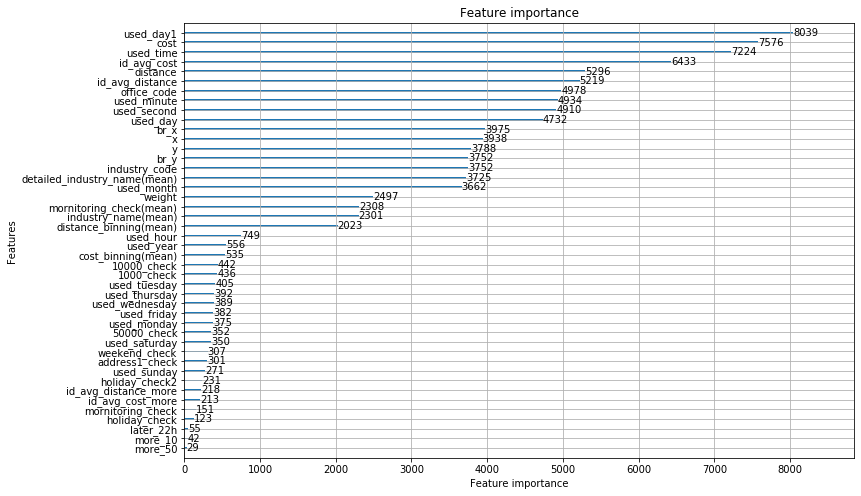

In [136]:
# 변수 중요도 출력
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(lgb, ax = ax)

### SMOTE + ENN 샘플링 적용 + is_unbalane 미적용

### Accuracy : 99.7% / Precision : 80.88% / Recall : 87.95% / F1-score : 84.27%

In [137]:
lgb = LGBMClassifier(n_estimators = 4000, min_data_in_leaf=15, num_leaves=100, learning_rate=0.088, min_child_samples=30)
evals = [(df_test_x, df_test_y)]
lgb.fit(df_train_x_over, df_train_y_over, early_stopping_rounds = 2000, eval_metric = "AUC", eval_set = evals, verbose = True)

y_logloss: 0.0117188
[2588]	valid_0's auc: 0.998876	valid_0's binary_logloss: 0.011727
[2589]	valid_0's auc: 0.998876	valid_0's binary_logloss: 0.0117309
[2590]	valid_0's auc: 0.998876	valid_0's binary_logloss: 0.0117302
[2591]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117342
[2592]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117364
[2593]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117379
[2594]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117429
[2595]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117477
[2596]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117483
[2597]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117554
[2598]	valid_0's auc: 0.998877	valid_0's binary_logloss: 0.0117575
[2599]	valid_0's auc: 0.998878	valid_0's binary_logloss: 0.0117614
[2600]	valid_0's auc: 0.998878	valid_0's binary_logloss: 0.0117609
[2601]	valid_0's auc: 0.998878	valid_0's binary_logloss: 0.0117625
[2602]	valid_0's auc: 0.998878	valid_0's b

LGBMClassifier(learning_rate=0.088, min_child_samples=30, min_data_in_leaf=15,
               n_estimators=4000, num_leaves=100)

In [138]:
# 평가
y_pred = lgb.predict(df_test_x, num_iteration=lgb.best_iteration_)
# y_pred = lgb.predict(df_test_x, num_iteration=1306)
print("Accuracy: {0:.3f}\n".format(lgb.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.997

              precision    recall  f1-score   support

     class 0     0.9990    0.9983    0.9987    451928
     class 1     0.8088    0.8795    0.8427      3602

    accuracy                         0.9974    455530
   macro avg     0.9039    0.9389    0.9207    455530
weighted avg     0.9975    0.9974    0.9975    455530

Confusion matrix: 
[[451179    749]
 [   434   3168]]


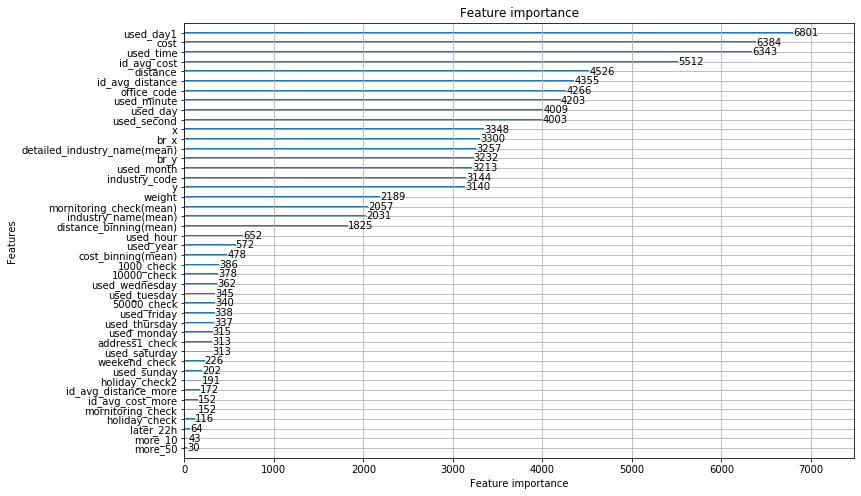

In [139]:
# 변수 중요도 출력
fig, ax = plt.subplots(figsize=(12, 8))
plot_importance(lgb, ax = ax)

## Decision Tree

### SMOTE + ENN 미적용

### Accuracy : 99.2% / Precision : 48.25% / Recall : 50.44% / F1-score : 49.32%

In [141]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier()

In [142]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.992

              precision    recall  f1-score   support

     class 0     0.9960    0.9957    0.9959    451928
     class 1     0.4825    0.5044    0.4932      3602

    accuracy                         0.9918    455530
   macro avg     0.7393    0.7501    0.7445    455530
weighted avg     0.9920    0.9918    0.9919    455530

Confusion matrix: 
[[449979   1949]
 [  1785   1817]]


### SMOTE + ENN 적용

### Accuracy : 99.5% / Precision : 63.02% / Recall : 86.09% / F1-score : 72.77%

In [144]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x_over, df_train_y_over)

DecisionTreeClassifier()

In [146]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.995

              precision    recall  f1-score   support

     class 0     0.9989    0.9960    0.9974    451928
     class 1     0.6302    0.8609    0.7277      3602

    accuracy                         0.9949    455530
   macro avg     0.8145    0.9284    0.8626    455530
weighted avg     0.9960    0.9949    0.9953    455530

Confusion matrix: 
[[450108   1820]
 [   501   3101]]


## Decision Tree

### SMOTE + ENN 미적용

### Accuracy : 99.4% / Precision : 77.39% / Recall : 33.06% / F1-score : 46.33%

In [149]:
from sklearn.ensemble import RandomForestClassifier

rf_uncustomized = RandomForestClassifier()
rf_uncustomized.fit(df_train_x, df_train_y)

RandomForestClassifier()

In [150]:
# 평가
y_pred = rf_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_uncustomized.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.994

              precision    recall  f1-score   support

     class 0     0.9947    0.9992    0.9970    451928
     class 1     0.7739    0.3306    0.4633      3602

    accuracy                         0.9939    455530
   macro avg     0.8843    0.6649    0.7301    455530
weighted avg     0.9929    0.9939    0.9927    455530

Confusion matrix: 
[[451580    348]
 [  2411   1191]]


### SMOTE + ENN 적용

### Accuracy : 99.6% / Precision : 73.38% / Recall : 86.31% / F1-score : 79.32%

In [151]:
from sklearn.ensemble import RandomForestClassifier

rf_uncustomized = RandomForestClassifier()
rf_uncustomized.fit(df_train_x_over, df_train_y_over)

RandomForestClassifier()

In [152]:
# 평가
y_pred = rf_uncustomized.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(rf_uncustomized.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.996

              precision    recall  f1-score   support

     class 0     0.9989    0.9975    0.9982    451928
     class 1     0.7338    0.8631    0.7932      3602

    accuracy                         0.9964    455530
   macro avg     0.8663    0.9303    0.8957    455530
weighted avg     0.9968    0.9964    0.9966    455530

Confusion matrix: 
[[450800   1128]
 [   493   3109]]


## Gradient Boosting 적용

### SMOTE + ENN 미적용

### Accuracy : 99.3% / Precision : 69.65% / Recall : 18.99% / F1-score : 29.84%

In [153]:
from sklearn.ensemble import GradientBoostingClassifier
gb_final = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.09)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(learning_rate=0.09)

In [154]:
# 평가
y_pred = gb_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.993

              precision    recall  f1-score   support

     class 0     0.9936    0.9993    0.9965    451928
     class 1     0.6965    0.1899    0.2984      3602

    accuracy                         0.9929    455530
   macro avg     0.8451    0.5946    0.6474    455530
weighted avg     0.9912    0.9929    0.9909    455530

Confusion matrix: 
[[451630    298]
 [  2918    684]]


### SMOTE + ENN 적용

### Accuracy : 96.5% / Precision : 17.33% / Recall : 89.76% / F1-score : 29.06%

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gb_final = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.09)
gb_final.fit(df_train_x_over, df_train_y_over)

GradientBoostingClassifier(learning_rate=0.09)

In [156]:
# 평가
y_pred = gb_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(gb_final.score(df_test_x, df_test_y)))
print(classification_report(df_test_y, y_pred, target_names=['class 0', 'class 1'], digits=4))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.965

              precision    recall  f1-score   support

     class 0     0.9992    0.9659    0.9822    451928
     class 1     0.1733    0.8976    0.2906      3602

    accuracy                         0.9653    455530
   macro avg     0.5862    0.9317    0.6364    455530
weighted avg     0.9926    0.9653    0.9768    455530

Confusion matrix: 
[[436509  15419]
 [   369   3233]]
